# Plant Disease Prediction

In [19]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data Preprocessing

### Training Image preprocessing

In [20]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


### Validation Image Preprocessing

In [21]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


## Building Model

In [22]:
cnn = tf.keras.models.Sequential()

### Building Convolution Layer

In [23]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [24]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [25]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [26]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [27]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [28]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [29]:
cnn.add(tf.keras.layers.Flatten())

In [30]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [31]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [32]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=38,activation='softmax'))

### Compiling and Training Phase

In [33]:
cnn.compile(optimizer=tf.keras.optimizers.legacy.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [34]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 conv2d_11 (Conv2D)          (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 63, 63, 64)        18496     
                                                                 
 conv2d_13 (Conv2D)          (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                 

In [35]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 [==============================] - 3773s 2s/step - loss: 1.4030 - accuracy: 0.5897 - val_loss: 0.6376 - val_accuracy: 0.8026
Epoch 2/10
2197/2197 [==============================] - 3401s 2s/step - loss: 0.4564 - accuracy: 0.8543 - val_loss: 0.3074 - val_accuracy: 0.9005
Epoch 3/10
2197/2197 [==============================] - 2733s 1s/step - loss: 0.2733 - accuracy: 0.9110 - val_loss: 0.2109 - val_accuracy: 0.9315
Epoch 4/10
2197/2197 [==============================] - 2803s 1s/step - loss: 0.1938 - accuracy: 0.9369 - val_loss: 0.1957 - val_accuracy: 0.9369
Epoch 5/10
2197/2197 [==============================] - 2748s 1s/step - loss: 0.1434 - accuracy: 0.9526 - val_loss: 0.2033 - val_accuracy: 0.9340
Epoch 6/10
2197/2197 [==============================] - 2737s 1s/step - loss: 0.1105 - accuracy: 0.9629 - val_loss: 0.1570 - val_accuracy: 0.9524
Epoch 7/10
2197/2197 [==============================] - 2723s 1s/step - loss: 0.0924 - accuracy: 0.9696 - val_loss: 0.1889 -

## Evaluating Model

In [36]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

2197/2197 [==============================] - 1161s 526ms/step - loss: 0.2341 - accuracy: 0.9374
Training accuracy: 0.9374493360519409


In [37]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

550/550 [==============================] - 217s 388ms/step - loss: 0.3900 - accuracy: 0.9069
Validation accuracy: 0.9068973660469055


### Saving Model

In [38]:
cnn.save('trained_plant_disease_model.keras')

In [39]:
training_history.history #Return Dictionary of history

{'loss': [1.402968168258667,
  0.45644524693489075,
  0.27326545119285583,
  0.1937912106513977,
  0.14342975616455078,
  0.11047693341970444,
  0.0924147218465805,
  0.07235216349363327,
  0.0636020302772522,
  0.05763278529047966],
 'accuracy': [0.5896720886230469,
  0.8542855381965637,
  0.9109751582145691,
  0.9369372129440308,
  0.9526140093803406,
  0.9629418849945068,
  0.9696422219276428,
  0.9760153889656067,
  0.9792872667312622,
  0.9808805584907532],
 'val_loss': [0.637619137763977,
  0.3074238896369934,
  0.2109069675207138,
  0.1957349330186844,
  0.20329417288303375,
  0.15700143575668335,
  0.18890967965126038,
  0.12194088101387024,
  0.10330396890640259,
  0.39003440737724304],
 'val_accuracy': [0.802583634853363,
  0.9005235433578491,
  0.9315388202667236,
  0.9369451403617859,
  0.9339858889579773,
  0.9524242877960205,
  0.9448554515838623,
  0.9630662202835083,
  0.969155490398407,
  0.9068973660469055]}

In [40]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [41]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


## Accuracy Visualization

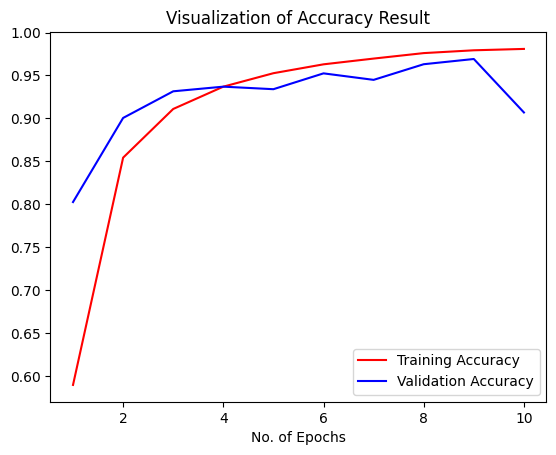

In [42]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

In [43]:
class_name = validation_set.class_names

In [44]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [45]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

17572/17572 [==============================] - 259s 15ms/step


In [46]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [47]:
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [48]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [49]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [50]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.93      0.92      0.93       504
                                 Apple___Black_rot       1.00      0.95      0.97       497
                          Apple___Cedar_apple_rust       0.83      0.94      0.88       440
                                   Apple___healthy       0.98      0.89      0.93       502
                               Blueberry___healthy       0.88      0.97      0.92       454
          Cherry_(including_sour)___Powdery_mildew       0.69      1.00      0.82       421
                 Cherry_(including_sour)___healthy       0.97      0.98      0.97       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.93      0.80      0.86       410
                       Corn_(maize)___Common_rust_       0.96      0.99      0.98       477
               Corn_(maize)___Northern_Leaf_Blight       0.79      0.99      0.

### Confusion Matrix Visualization

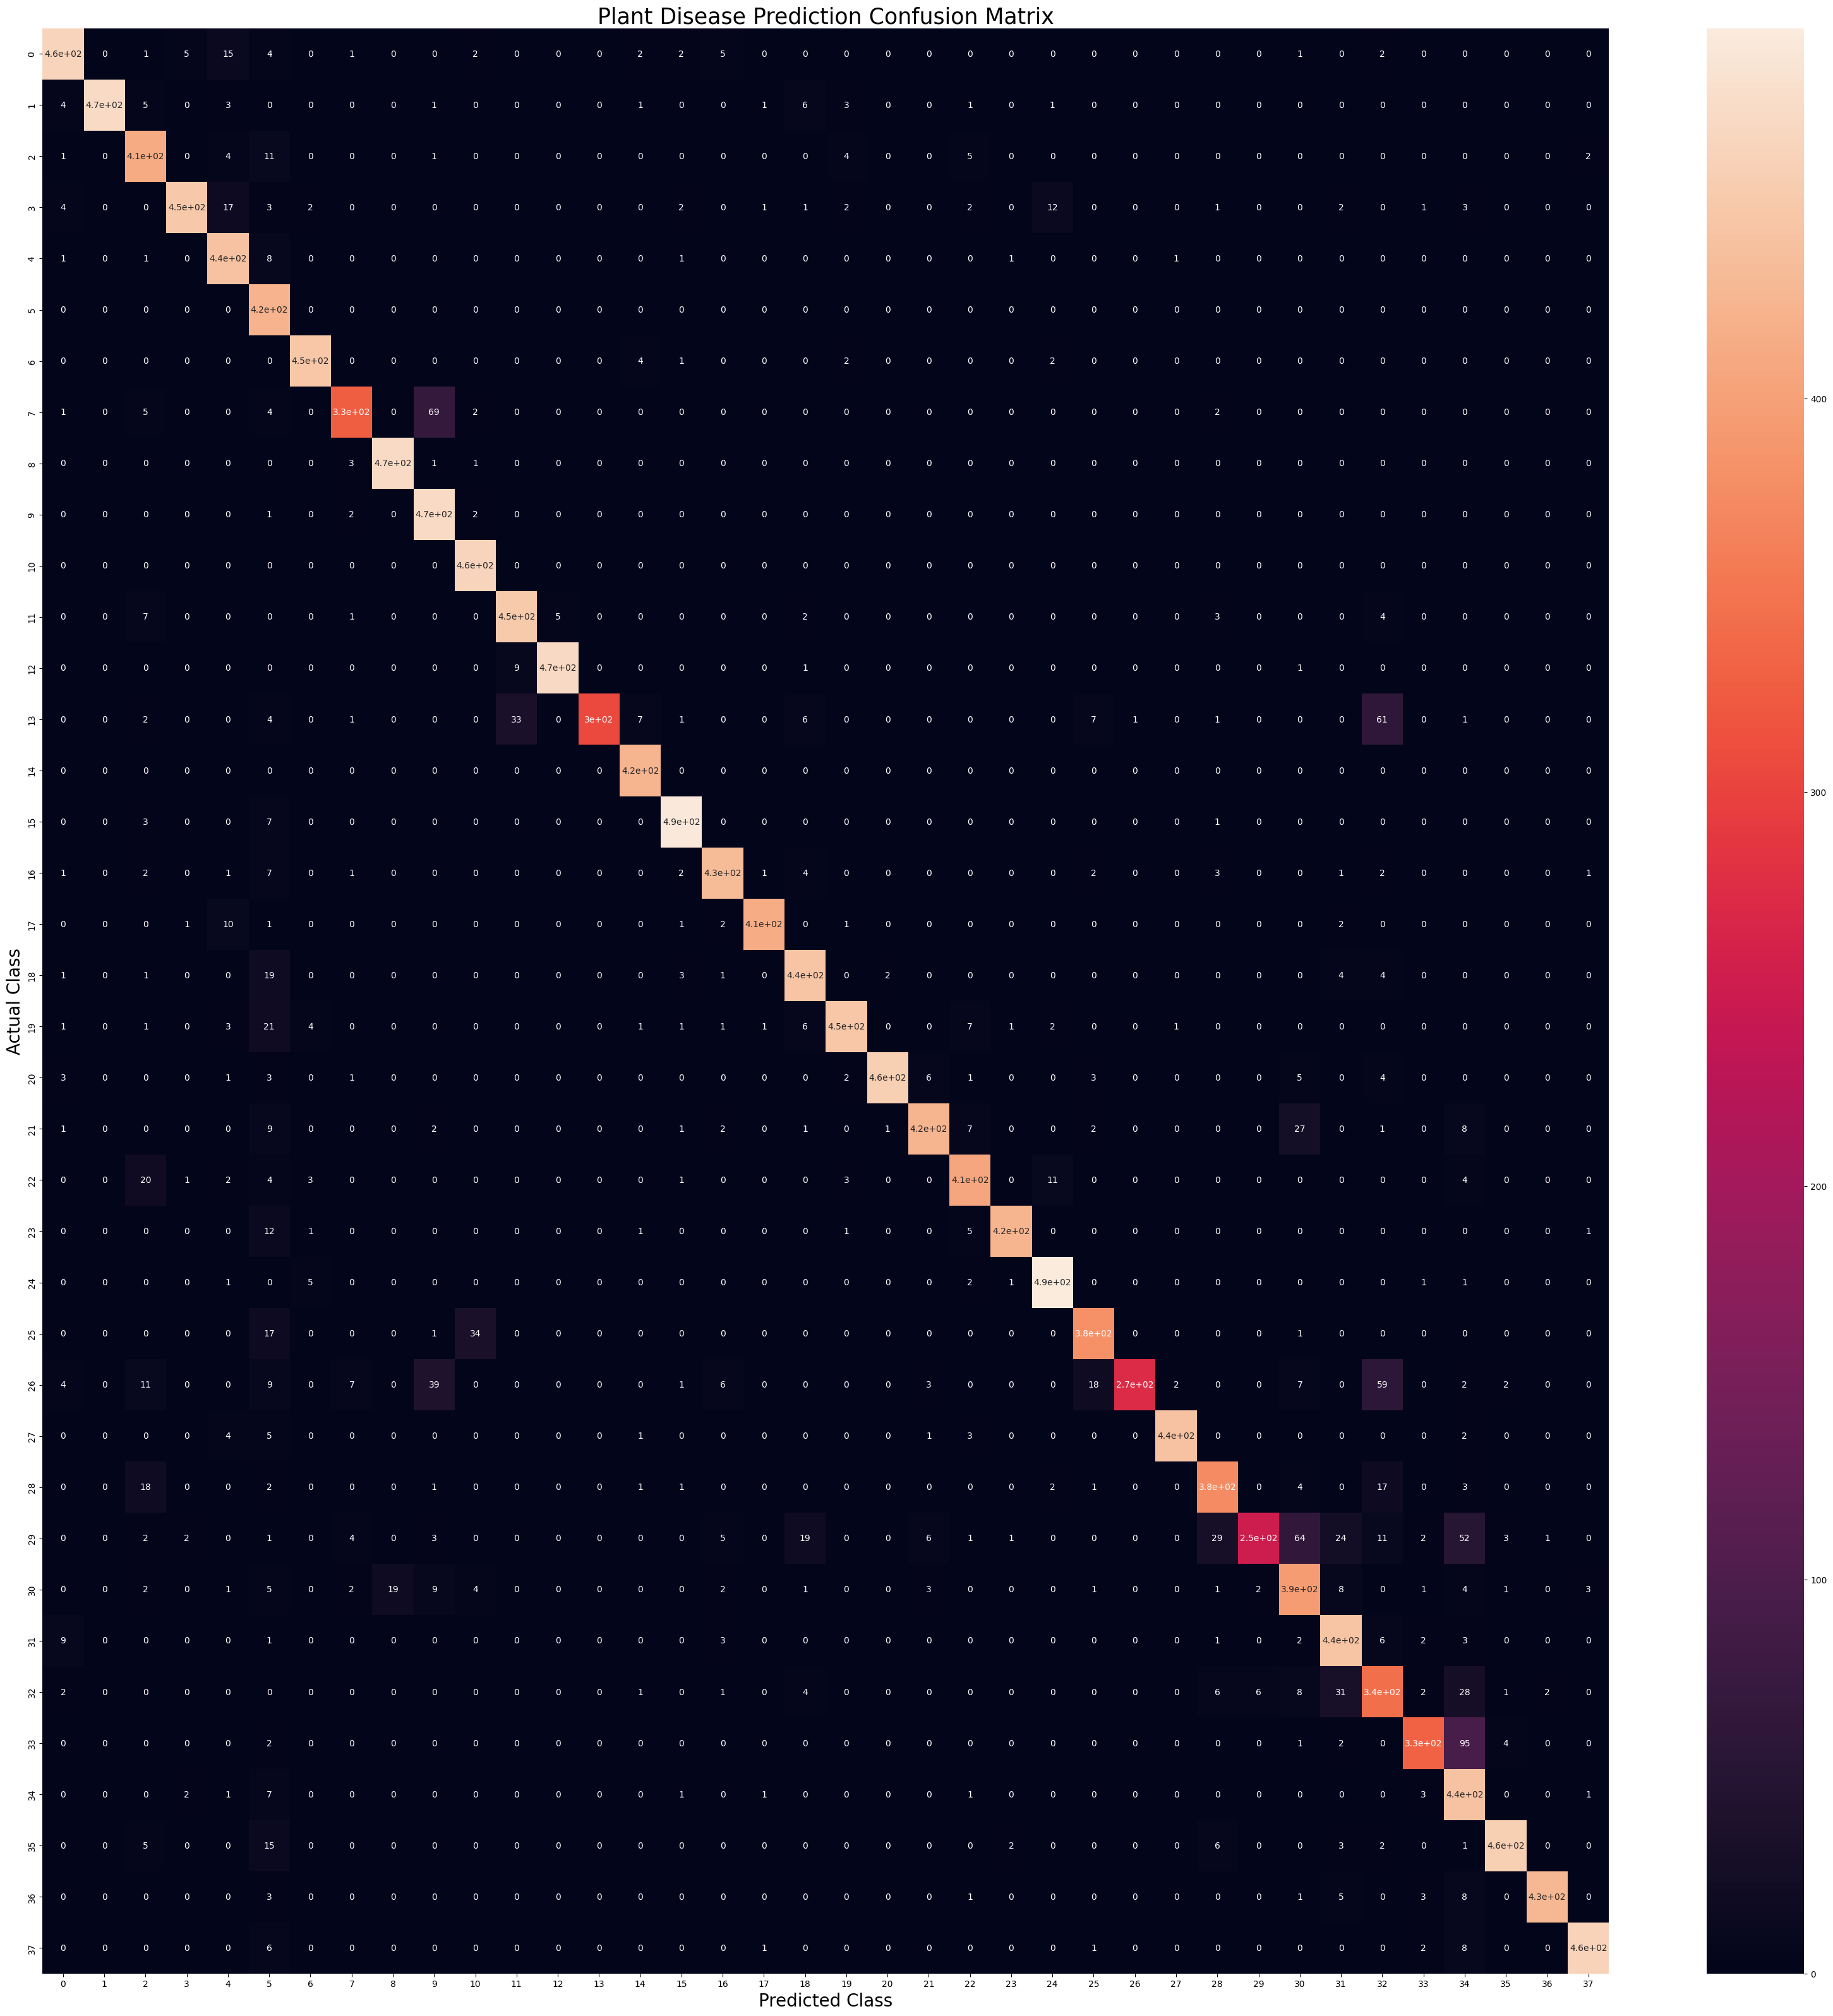

In [51]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()